# [Task] Predict the selling price for the [Vehicle Dataset](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

### Load the dataset, perform all necessary data exploration and preprocessing

### Perform proper hyperparameter tuning to choose the best base model, depth, max_features, and any other important hyper-parameters 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# **Loading data**

In [2]:
df=pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


# **EDA**

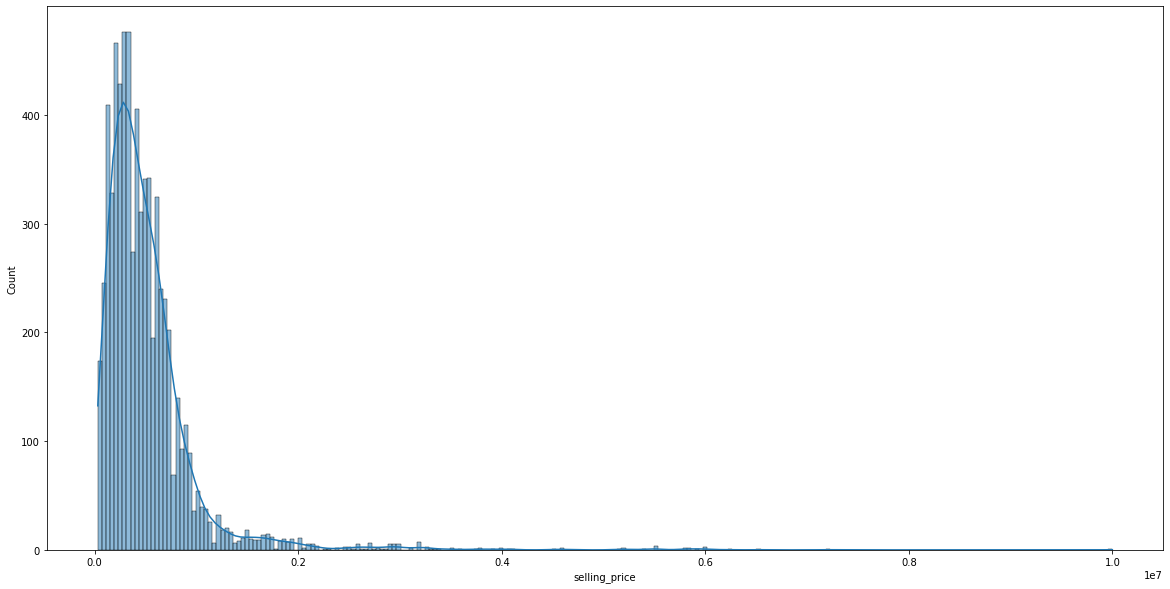

In [32]:
plt.figure(figsize= (20,10))
sns.histplot(x = 'selling_price', kde = True, data = df)

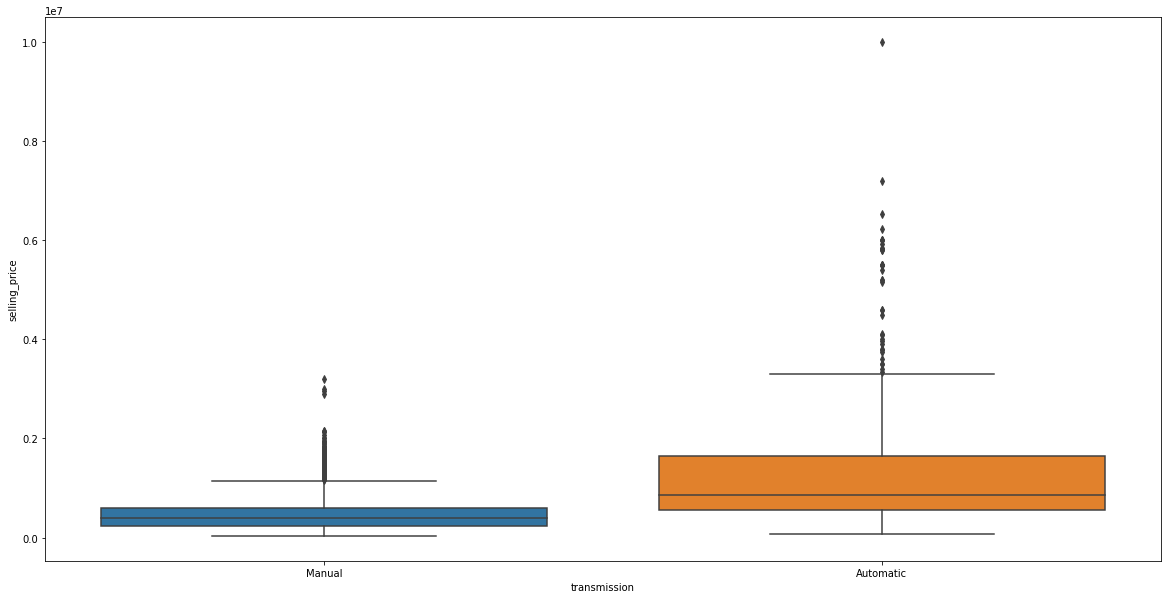

In [36]:
plt.figure(figsize= (20,10))
sns.boxplot(x= 'transmission' , y= 'selling_price', data = df)

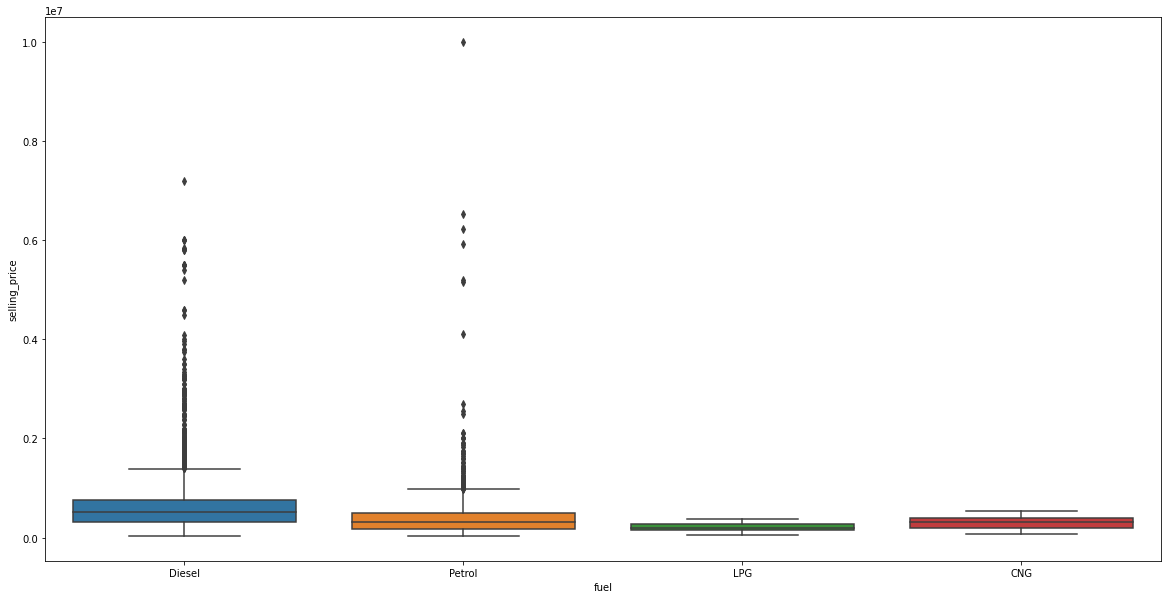

In [37]:
plt.figure(figsize= (20,10))
sns.boxplot(x= 'fuel' , y= 'selling_price', data = df)

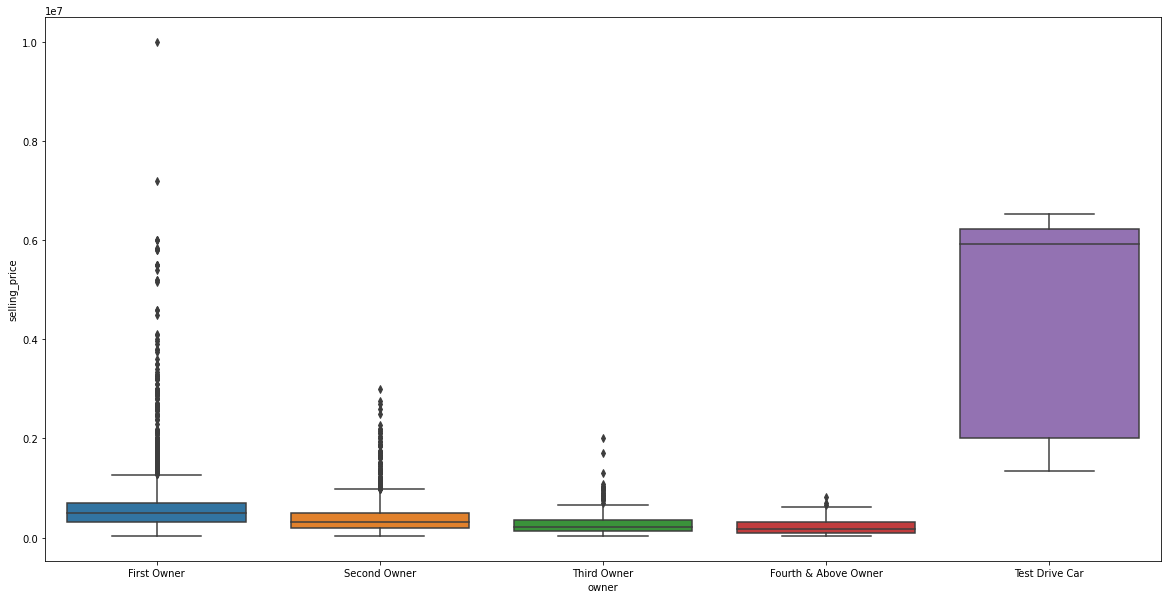

In [39]:
plt.figure(figsize= (20,10))
sns.boxplot(x= 'owner' , y= 'selling_price', data = df)

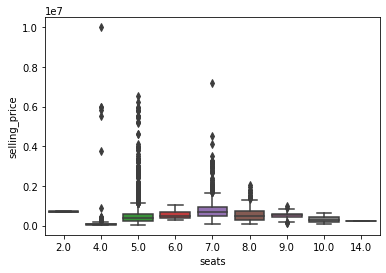

In [41]:
sns.boxplot(x= 'seats' , y= 'selling_price', data = df)

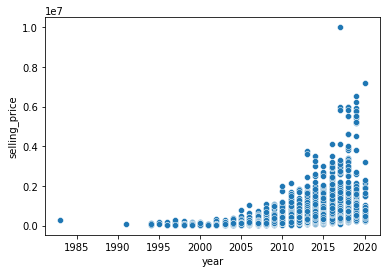

In [42]:
sns.scatterplot(x= 'year' , y= 'selling_price', data = df)

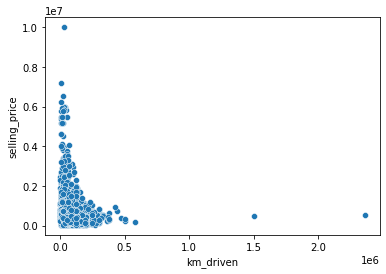

In [43]:
sns.scatterplot(x= 'km_driven' , y= 'selling_price', data = df)

**As expected, the more km_driven, the older the car, the lesser the price is. Also, as the number of owners increase, the price decreases with the test driver car way higher in price. Also, automatic cars are generally more expensive than manual cars. We can also norte that the selling price follows a skewed normal distribution.**

# **Data Cleaning and preprocessing**

In [4]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
df.duplicated().sum()

1202

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

First, I am going to drop the torque column as it's not straighforward to deal with and I don't know the rules that govern it. I am also going to drop the name as it's irrelevant to the price.

In [7]:
df.drop('torque',axis=1,inplace=True)

In [8]:
df.drop('name',axis=1,inplace=True) 


Second, I am going to drop CC from the engine column and bhp from the max_power and the milage unit.

Note: Even though there are different milage units for different fuel types, the units can be dropped as the fuel type is specified with each car.

In [9]:
df['engine']=df['engine'].str.extract(r'(^\d*)').astype(float)
df['max_power']=df['max_power'].str.extract(r'(\d+.\d*)').astype(float)
df['mileage']=df['mileage'].str.extract(r'(\d+.\d*)').astype(float)

**Columns transformers**

In [10]:
pip install catboost

In [11]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn import metrics
from collections import Counter

#from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6926 non-null   int64  
 1   selling_price  6926 non-null   int64  
 2   km_driven      6926 non-null   int64  
 3   fuel           6926 non-null   object 
 4   seller_type    6926 non-null   object 
 5   transmission   6926 non-null   object 
 6   owner          6926 non-null   object 
 7   mileage        6718 non-null   float64
 8   engine         6718 non-null   float64
 9   max_power      6717 non-null   float64
 10  seats          6718 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 649.3+ KB


**To deal with missing data, I will use knnImputer.**

In [13]:
scaler = StandardScaler()
imp_knn = KNNImputer(n_neighbors=6)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

ohe = OneHotEncoder()

num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']


In [14]:
preprocessor = make_column_transformer(
    (imp_knn, num_cols),
    (ohe, cat_cols),
    remainder='passthrough')

In [15]:
X = df.drop('selling_price', axis = 1)
y = df['selling_price']


In [16]:
preprocessor.fit_transform(X)
X

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8121,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,2014,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [17]:
transformed_column_names = (num_cols +
                            preprocessor.named_transformers_['onehotencoder'].
                            get_feature_names_out().tolist())


In [18]:
X

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
8121,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,2014,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [19]:
X = pd.DataFrame(preprocessor.fit_transform(X),
                 columns=transformed_column_names)

In [20]:
X

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014.0,145500.0,23.40,1248.0,74.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,2014.0,120000.0,21.14,1498.0,103.52,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2006.0,140000.0,17.70,1497.0,78.00,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2010.0,127000.0,23.00,1396.0,90.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,2007.0,120000.0,16.10,1298.0,88.20,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6921,2013.0,50000.0,18.90,998.0,67.10,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6922,2014.0,80000.0,22.54,1396.0,88.73,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6923,2013.0,110000.0,18.50,1197.0,82.85,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6924,2007.0,119000.0,16.80,1493.0,110.00,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [22]:
X.isna().sum()

year                            0
km_driven                       0
mileage                         0
engine                          0
max_power                       0
seats                           0
fuel_CNG                        0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Dealer              0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Automatic          0
transmission_Manual             0
owner_First Owner               0
owner_Fourth & Above Owner      0
owner_Second Owner              0
owner_Test Drive Car            0
owner_Third Owner               0
dtype: int64

In [23]:
y_train

5586    900000
3468    120000
4935    395000
2485    185000
4491    108000
         ...  
4286    120000
5986    229999
6021    369000
6268    595000
914     710000
Name: selling_price, Length: 5540, dtype: int64

# **Modeling**
I will try different models and test their accuracy. The models are:


1.   Decision Tree
2.   Random forest regression
3. K neighbor regression
4. Cat boost regression
5. Linear regression



In [24]:
Models = {
    'Decison Tree': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'CatBoost': CatBoostRegressor(),
    'LinReg': LinearRegression()
}

In [25]:
model_list = []
train_r2_list = []
train_MSE_list = []
counter_list = []
test_r2 = []
test_MSE = []

# Main model loop
for model, clf in Models.items():
    print('Running on '+model)
    print(60*'=')
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    r2 = metrics.r2_score(y_test, predictions)
    MSE = metrics.mean_squared_error(y_test, predictions, squared=False)
    train_pred = clf.predict(X_train)
    train_r2 = metrics.r2_score(y_train, train_pred)
    train_MSE = metrics.mean_squared_error(y_train, train_pred, squared=False)
    counter = Counter(predictions)
    
  

    model_list.append(model)
    train_r2_list.append(train_r2)
    counter_list.append(counter)
    test_r2.append(r2)
    train_MSE_list.append(train_MSE)
    test_MSE.append(MSE)

results = pd.DataFrame({
    "model": model_list,
    "train_R2_Score": train_r2_list,
    'test_r2': test_r2,
    'train_MSE': train_MSE_list,
    'test_MSE': test_MSE,
    'counter': counter_list
})

Running on Decison Tree
Running on RF
Running on KNN
Running on CatBoost
Learning rate set to 0.05366
0:	learn: 513853.1742174	total: 48.5ms	remaining: 48.5s
1:	learn: 496406.7946336	total: 51ms	remaining: 25.5s
2:	learn: 479461.0766050	total: 52.7ms	remaining: 17.5s
3:	learn: 462940.5837052	total: 54.3ms	remaining: 13.5s
4:	learn: 447750.5259018	total: 55.9ms	remaining: 11.1s
5:	learn: 432546.9357796	total: 57.5ms	remaining: 9.53s
6:	learn: 418934.0461486	total: 59.2ms	remaining: 8.4s
7:	learn: 407045.1316755	total: 61.9ms	remaining: 7.67s
8:	learn: 394505.4186397	total: 63.6ms	remaining: 7s
9:	learn: 382558.3678835	total: 65.2ms	remaining: 6.45s
10:	learn: 370678.7840344	total: 66.8ms	remaining: 6.01s
11:	learn: 360274.2543335	total: 68.5ms	remaining: 5.64s
12:	learn: 350585.2383409	total: 70.1ms	remaining: 5.32s
13:	learn: 340877.7371216	total: 71.8ms	remaining: 5.06s
14:	learn: 331619.8270692	total: 73.5ms	remaining: 4.83s
15:	learn: 324122.4129698	total: 75.2ms	remaining: 4.63s
16

In [26]:
results

,model,train_R2_Score,test_r2,train_MSE,test_MSE,counter
0,Decison Tree,0.999242,0.874524,14643.317887,165890.187090,"{600000.0: 23, 944999.0: 1, 880000.0: 2, 11000..."
1,RF,0.984551,0.919395,66091.285601,132960.311065,"{692999.97: 1, 1035157.2025: 1, 854256.6666666..."
2,KNN,0.669422,0.411922,305723.869064,359135.444586,"{655000.0: 5, 1382000.0: 1, 618000.0: 1, 12299..."
3,CatBoost,0.977132,0.902961,80409.906278,145886.071704,"{682898.9616389085: 1, 1019947.5605756645: 1, ..."
4,LinReg,0.654548,0.544602,312526.162534,316035.749900,"{390468.358373709: 1, 1197235.49004405: 1, 770..."


The best performing model is the random forest.

# **Cross Validation**

In [27]:
RF=RandomForestRegressor()
p_grid= {'n_estimators' : np.arange(10,100,10), 'max_features' : ['auto', 'sqrt'],
         'max_depth' : np.arange(2,20,2)}
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = p_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)
RF_random.fit(X_train,y_train)

RF_random.best_params_, RF_random.best_score_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


({'max_depth': 16, 'max_features': 'auto', 'n_estimators': 60},
 0.8813925023755873)